# Analisis de fuga de clientes - Fine tuning de parametros

**Autor:** Roberto Muñoz <br />
**Github:** <https://github.com/rpmunoz> <br />

Este notebook muestra cómo entrenar un modelo de fuga de clientes y explorar el esapcio de parámetros de los modelos para determinar el modelo con el mejor scoring.

Este notebook se apoya en múltiples librerías estándar de python:

- numpy
- pandas
- matplotlib
- seaborn
- scikit-learn


Churn is a one of the biggest problem in  the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%. 

In [1]:
import os
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

sns.set(style = 'white')

## Cargamos los datos generados en el paso de data preparation

In [2]:
dataFile = 'data/Industria telco Kaggle - analisis de fuga - processed.csv'

dataDF = pd.read_csv(dataFile)
dataDF.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Normalizamos los datos y generamos train-test dataset

Usaremos el metodo MinMaxScaler para normalizar los datos y el metodo train_test_split para separar los datos en train-test

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
# We will use the data frame where we had created dummy variables
y = dataDF['Churn'].values
X = dataDF.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [5]:
print("Clase 0: ", np.sum(y==0))
print("Clase 1: ", np.sum(y==1))

Clase 0:  5163
Clase 1:  1869


In [6]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [7]:
list(features)

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank tran

Es importante escalar las variables en la regresión logística para que todas estén dentro de un rango de 0 a 1. Esto me ayudó a mejorar la precisión del 79,7% al 80,7%.

Además, notará a continuación que la importancia de las variables también está alineada con lo que estamos viendo en el algoritmo Random Forest y la EDA que realizamos anteriormente.

In [8]:
# Create Train & Test Data

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
print("Tamaño dataset train: ", len(xTrain))
print("Tamaño dataset test : ", len(xTest))

Tamaño dataset train:  4922
Tamaño dataset test :  2110


## Entrenar modelos de machine learning

Entrenaremos algunos modelos de Logistic Regression, Random Forest, SVM, ADA Boost and XG Boost

### 1. Modelo de fuga usando metodo de Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
model = LogisticRegression(max_iter=1000)

model.fit(xTrain, yTrain)

LogisticRegression(max_iter=1000)

In [12]:
model

LogisticRegression(max_iter=1000)

In [13]:
yPred = model.predict(xTest)

In [14]:
print(len(yPred))
print(yPred)

2110
[0 0 1 ... 0 0 0]


**Prediccion**: Numero de elementos por clase

In [15]:
unique, counts = np.unique(yPred, return_counts=True)
dict(zip(unique, counts))

{0: 1644, 1: 466}

**Valores verdaderos**: Numero de elementos por clase

In [16]:
unique, counts = np.unique(yTest, return_counts=True)
dict(zip(unique, counts))

{0: 1549, 1: 561}

In [17]:
cm = confusion_matrix(yTest, yPred, labels=[0, 1])
cm

array([[1381,  168],
       [ 263,  298]], dtype=int64)

0 : Clientes que se quedaron
1 : Clientes que se fugaron

        Prediccion 
              0       1
Actual  0   1381     168
        1    263     298
        
Para el año 2019, nosotros sabemos que (Actual, la Realidad)

Clase 0: Se quedaron con nosotros = 1381 + 168 = 1549
Clase 1: Se fugaron = 263 + 298 = 561

In [18]:
# Print the prediction accuracy
accuracy = accuracy_score(yTest, yPred)

print("Accuracy: ", accuracy)

Accuracy:  0.795734597156398


In [19]:
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



Revisamos que variables son mas importantes que otras al construir el modelo de clasificacion

AxesSubplot(0.125,0.125;0.775x0.755)


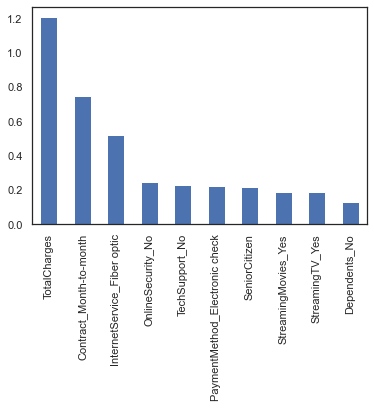

In [20]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)

print(weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


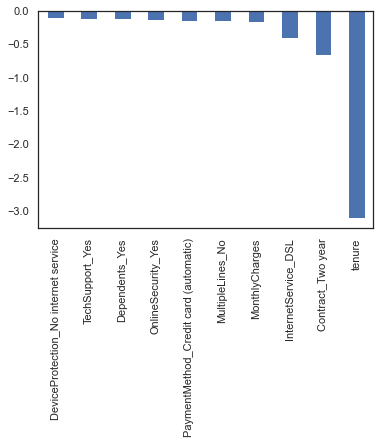

In [21]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

**Notas**

Podemos ver que algunas variables tienen una relación negativa con nuestra variable predicha (Churn), mientras que otras tienen una relación positiva. La relación negativa significa que la probabilidad de abandono disminuye con esa variable. Resumamos algunas de las características interesantes a continuación:

* Como vimos en nuestra EDA, tener un contrato de 2 meses reduce las posibilidades de abandono. El contrato de 2 meses junto con la tenencia tienen la relación más negativa con el Churn según lo predicho por las regresiones logísticas
* Tener servicio de Internet DSL también reduce la probabilidad de abandono
* Por último, los cargos totales, los contratos mensuales, los servicios de Internet de fibra óptica y la antigüedad pueden generar tasas de abandono más altas. Esto es interesante porque aunque los servicios de fibra óptica son más rápidos, es probable que los clientes abandonen debido a ello. Creo que necesitamos explorar más para comprender mejor por qué está sucediendo esto.

¡Cualquier hipótesis sobre lo anterior sería realmente útil!

### 2. Exportamos del modelo de fuga logistic regression

In [22]:
import joblib

In [23]:
modelFile= 'models/churn_model_logregression.joblib'
joblib.dump(model, modelFile)

['models/churn_model_logregression.joblib']

In [24]:
del(model)

In [25]:
model = joblib.load(modelFile)
print(model)

LogisticRegression(max_iter=1000)


### 3. Modelo de fuga usando metodo de Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

#### 3.1 Modelo usando parametros por defecto

In [27]:
model = RandomForestClassifier()
model.fit(xTrain, yTrain)

RandomForestClassifier()

In [28]:
yPred = model.predict(xTest)

**Prediccion**: Numero de elementos por clase

In [29]:
unique, counts = np.unique(yPred, return_counts=True)
dict(zip(unique, counts))

{0: 1673, 1: 437}

**Valores verdaderos**: Numero de elementos por clase

In [30]:
unique, counts = np.unique(yTest, return_counts=True)
dict(zip(unique, counts))

{0: 1549, 1: 561}

In [31]:
cm = confusion_matrix(yTest, yPred, labels=[0, 1])
cm

array([[1379,  170],
       [ 294,  267]], dtype=int64)

In [32]:
# Print the prediction accuracy
accuracy = accuracy_score(yTest, yPred)

print("Accuracy: ", accuracy)

Accuracy:  0.7800947867298578


In [33]:
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1549
           1       0.61      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



#### 3.2 Modelo usando parametros custom1

In [34]:
model = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model.fit(xTrain, yTrain)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [35]:
yPred = model.predict(xTest)

cm = confusion_matrix(yTest, yPred, labels=[0, 1])
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.66      0.45      0.53       561

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



#### 3.3 Modelo usando parametros custom2

In [36]:
model = RandomForestClassifier(n_estimators=100 , oob_score = False, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 10)
model.fit(xTrain, yTrain)

RandomForestClassifier(max_leaf_nodes=10, n_jobs=-1, random_state=50)

In [37]:
model = RandomForestClassifier(n_estimators=10 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 100)
model.fit(xTrain, yTrain)

C:\Users\rmunoz\anaconda3\envs\workshop\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\rmunoz\anaconda3\envs\workshop\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(max_leaf_nodes=100, n_estimators=10, n_jobs=-1,
                       oob_score=True, random_state=50)

In [38]:
yPred = model.predict(xTest)

cm = confusion_matrix(yTest, yPred, labels=[0, 1])
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



#### 3.4 Busqueda de parametros optimos recorriendo grilla

In [39]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

In [55]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 110, num = 22)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5,
               10,
               15,
               20,
               25,
               30,
               35,
               40,
               45,
               50,
               55,
               60,
               65,
               70,
               75,
               80,
               85,
               90,
               95,
               100,
               105,
               110,
               None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [56]:
%%time

rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 300, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(xTrain, yTrain)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  5.5min finished


Wall time: 5min 39s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, 60, 65,
                                                      70, 75, 80, 85, 90, 95,
                                                      100, 105, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

Imprimimos en pantalla el mejor set de parametros

In [57]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [58]:
model = rf_random.best_estimator_
model

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=2000)

In [59]:
yPred = model.predict(xTest)

cm = confusion_matrix(yTest, yPred, labels=[0, 1])
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.49      0.56       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



El metodo RandomizedSearchCV usa el accuracy como metrica por defecto para identificar el mejor modelo. Para este caso, buscaremo el modelo que optimiza el recall de la clase 1

In [63]:
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, recall_score

In [64]:
def custom_scorer(y_true, y_pred, actual_scorer):
    score = np.nan

    try:
      score = actual_scorer(y_true, y_pred)
    except Exception: 
      pass

    return score

recall = make_scorer(custom_scorer, actual_scorer = recall_score)
acc = make_scorer(custom_scorer, actual_scorer = accuracy_score)

#acc = make_scorer(custom_scorer, actual_scorer = accuracy_score)
#auc_score = make_scorer(custom_scorer, actual_scorer = roc_auc_score, 
#                        needs_threshold=True) # <== Added this to get correct roc

In [65]:
%%time

rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 300,
                               scoring={"recall": recall, "accuracy": acc}, refit="recall",
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(xTrain, yTrain)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  5.5min finished


Wall time: 5min 37s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, 60, 65,
                                                      70, 75, 80, 85, 90, 95,
                                                      100, 105, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, refit='recall',
                 

In [66]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [67]:
model = rf_random.best_estimator_
model

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=5,
                       n_estimators=1200)

In [68]:
yPred = model.predict(xTest)

cm = confusion_matrix(yTest, yPred, labels=[0, 1])
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.50      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.78      0.79      0.79      2110



### 4. Comparacion entre los modelos

**Modelo 1**: Logistic regression

        precision    recall  f1-score   support
    1       0.64      0.53      0.58       561

**Modelo 2**: RandomForest - Default param

        precision    recall  f1-score   support
    1       0.62      0.48      0.54       561

**Modelo 3**: Random Forest - Custom parameters v1

        precision    recall  f1-score   support
    1       0.66      0.45      0.53       561

**Modelo 4**: Random Forest - Best model using gridsearch and accuracy

        precision    recall  f1-score   support
    1       0.66      0.49      0.56       561

**Modelo 5**: Random Forest - Best model using gridsearch and recall

        precision    recall  f1-score   support
    1       0.65      0.50      0.57       561

### 5. Exportamos del modelo de fuga random forest

In [69]:
import joblib

In [70]:
modelFile= 'models/churn_model_randomforest.joblib'
joblib.dump(model, modelFile)

['models/churn_model_randomforest.joblib']

In [73]:
del(model)

In [74]:
model = joblib.load(modelFile)
print(model)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=5,
                       n_estimators=1200)


### 5. Revisamos las variables mas relevante de acuerdo a RF

<AxesSubplot:>

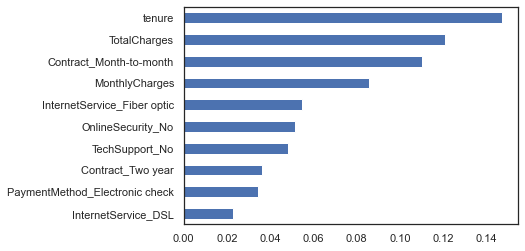

In [75]:
importances = model.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

**Notas:**

* A partir del algoritmo de bosque aleatorio, el contrato mensual, la tenencia y los cargos totales son las variables predictoras más importantes para predecir la deserción.
* Los resultados del bosque aleatorio son muy similares a los de la regresión logística y están en línea con lo que esperábamos de nuestra EDA